In [5]:
pwd


'C:\\Users\\soumy'

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, TimeDistributed, LSTM, Dense, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from keras.metrics import Precision, Recall
import warnings
warnings.filterwarnings("ignore")
# Constants
VIDEO_DIR = "Real Life Violence Dataset"
LABELS = {"Violence": 1, "NonViolence": 0}
IMG_HEIGHT, IMG_WIDTH = 64, 64
NUM_FRAMES = 20  # Number of frames to consider per video
BATCH_SIZE = 32
EPOCHS = 10

# Function to load and preprocess video frames
def load_video_frames(video_path):
    frames = []
    cap = cv2.VideoCapture(video_path)
    while len(frames) < NUM_FRAMES:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (IMG_WIDTH, IMG_HEIGHT))
        frame = frame / 255.0  
        frames.append(frame)
    cap.release()
    return np.array(frames)

# Load video data and labels
X, y = [], []
for label, class_id in LABELS.items():
    label_dir = os.path.join(VIDEO_DIR, label)
    for video_file in os.listdir(label_dir):
        video_path = os.path.join(label_dir, video_file)
        frames = load_video_frames(video_path)
        if len(frames) == NUM_FRAMES:
            X.append(frames)
            y.append(class_id)

X = np.array(X)
y = np.array(y)
def visualize_sample_videos():
    fig, axs = plt.subplots(len(LABELS), 5, figsize=(15, 5*len(LABELS)))
    for i, label in enumerate(LABELS):
        label_dir = os.path.join(VIDEO_DIR, label)
        video_files = os.listdir(label_dir)[:5]  # Visualize only the first 5 videos per class
        for j, video_file in enumerate(video_files):
            video_path = os.path.join(label_dir, video_file)
            cap = cv2.VideoCapture(video_path)
            ret, frame = cap.read()
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
            axs[i, j].imshow(frame)
            axs[i, j].set_title(label)
            axs[i, j].axis('off')
            cap.release()
    plt.show()

# Function to analyze video lengths
def analyze_video_lengths():
    video_lengths = {label: [] for label in LABELS}
    for label in LABELS:
        label_dir = os.path.join(VIDEO_DIR, label)
        for video_file in os.listdir(label_dir):
            video_path = os.path.join(label_dir, video_file)
            cap = cv2.VideoCapture(video_path)
            length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            video_lengths[label].append(length)
            cap.release()
    return video_lengths

# Function to visualize video length distributions
def visualize_video_length_distributions(video_lengths):
    plt.figure(figsize=(10, 6))
    for label in LABELS:
        plt.hist(video_lengths[label], bins=20, alpha=0.5, label=label, density=True)
    plt.xlabel('Video Length')
    plt.ylabel('Density')
    plt.title('Distribution of Video Lengths')
    plt.legend()
    plt.show()

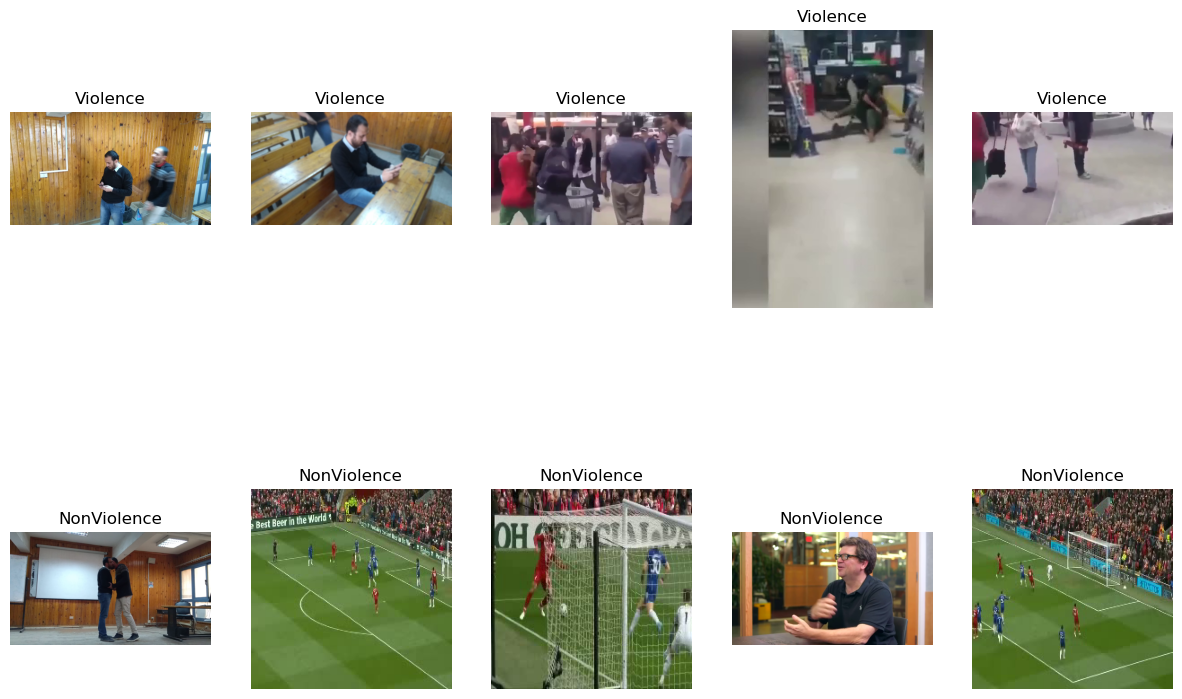

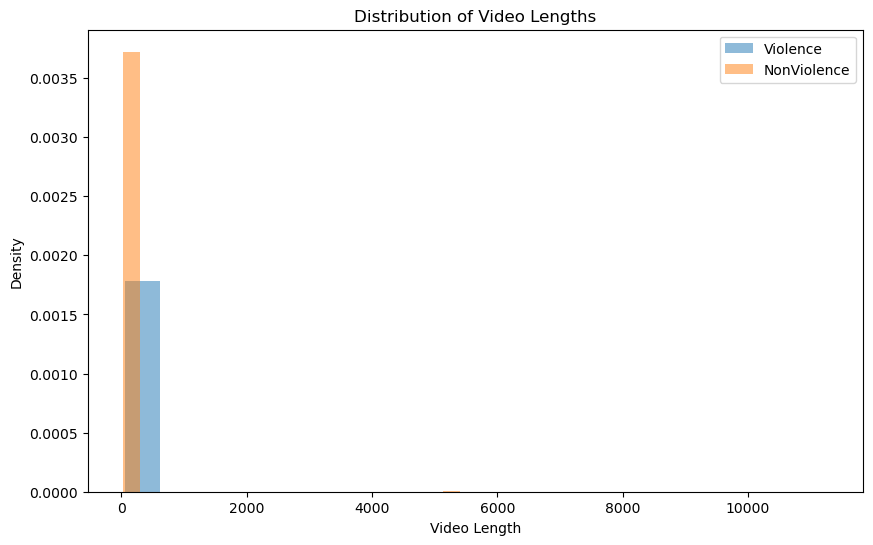

In [7]:
# Visualize sample videos
visualize_sample_videos()

# Analyze video lengths
video_lengths = analyze_video_lengths()

# Visualize video length distributions
visualize_video_length_distributions(video_lengths)

In [8]:
    
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Define CRNN model
model = Sequential()
model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=(NUM_FRAMES, IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(Conv2D(128, (3, 3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with additional metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Train the model
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy, precision, recall = model.evaluate(X_val, y_val)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
# Predict on validation data
y_pred = model.predict(X_val)

# Convert predicted probabilities into binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_binary))

Epoch 1/10
50/50 [==============================] - 78s 2s/step - loss: 0.6766 - accuracy: 0.5537 - precision_1: 0.5486 - recall_1: 0.6130 - val_loss: 0.6274 - val_accuracy: 0.6225 - val_precision_1: 0.5930 - val_recall_1: 0.7688
Epoch 2/10
50/50 [==============================] - 67s 1s/step - loss: 0.6211 - accuracy: 0.6513 - precision_1: 0.6884 - recall_1: 0.5543 - val_loss: 0.6342 - val_accuracy: 0.6500 - val_precision_1: 0.7611 - val_recall_1: 0.4322
Epoch 3/10
50/50 [==============================] - 67s 1s/step - loss: 0.5479 - accuracy: 0.7281 - precision_1: 0.7480 - recall_1: 0.6891 - val_loss: 0.5709 - val_accuracy: 0.7225 - val_precision_1: 0.8607 - val_recall_1: 0.5276
Epoch 4/10
50/50 [==============================] - 68s 1s/step - loss: 0.4610 - accuracy: 0.7837 - precision_1: 0.8021 - recall_1: 0.7541 - val_loss: 0.5068 - val_accuracy: 0.7525 - val_precision_1: 0.8788 - val_recall_1: 0.5829
Epoch 5/10
50/50 [==============================] - 76s 2s/step - loss: 0.3771 -